# Greed is Good: Exploration and Exploitation Trade-offs in Bayesian Optimisation

This notebook contains the code needed to reproduce the results plots and tables used in the paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add the egreedy module to the path (one directory up from this)
import sys, os
sys.path.append(os.path.realpath(os.path.pardir))

from egreedy.util.plotting import *

# configure matplotlib to use latex so we're able to use the libertine font
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}',
                                       r'\usepackage[libertine]{newtxmath}',
                                       r'\usepackage{sfmath}',
                                       r'\usepackage[T1]{fontenc}'
                                      ]

%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
# settings define all the results we wish to process
results_dir = r'..\results_paper'

problem_names = [
    'WangFreitas', 'BraninForrester', 'Branin', 'Cosines',
    'logGoldsteinPrice', 'logSixHumpCamel', 'logHartmann6', 
    'logGSobol', 'logStyblinskiTang', 'logRosenbrock', 
    'push4', 'push8',
    
    # additional experiments in supplementary material    
    'GoldsteinPrice', 'SixHumpCamel', 'Hartmann6',
    'GSobol', 'StyblinskiTang', 'Rosenbrock',
]

problem_names_for_paper = [    
    'WangFreitas', 'BraninForrester', 'Branin', 'Cosines',
    'logGoldsteinPrice', 'logSixHumpCamel', 'logHartmann6',
    'logGSobol', 'logStyblinskiTang', 'logRosenbrock',
    '\\textsc{push4}', '\\textsc{push8}',

    # additional experiments in supplementary material  
    'GoldsteinPrice', 'SixHumpCamel', 'Hartmann6', 
    'GSobol', 'StyblinskiTang', 'Rosenbrock',
]

# boolean indicating whether the problem should be plotted with a log axis
problem_logplot = [
    True, True, True, True,
    True, True, True,
    False, False, False,
    True, False,

    # additional experiments in supplementary material  
    True, True, True,
    True, False, True,
]

method_names = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 'PFRandom',
                'eRandom_eps0.1', 'eFront_eps0.1', 'Exploit']

method_names_for_paper = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 
                          'PFRandom', '$\epsilon$-RS', '$\epsilon$-PF',
                          'Exploit' ]

eg_names = [
    'eFront_eps0.01', 'eRandom_eps0.01',
    'eFront_eps0.05', 'eRandom_eps0.05',
    'eFront_eps0.1',  'eRandom_eps0.1',
    'eFront_eps0.2',  'eRandom_eps0.2',
    'eFront_eps0.3',  'eRandom_eps0.3',
    'eFront_eps0.4',  'eRandom_eps0.4',
    'eFront_eps0.5',  'eRandom_eps0.5'
]

exp_no_start = 1
exp_no_end = 51
budget = 250

##### Set this to True to save the plots

In [3]:
save_images = False

# Read in and process optimisation runs
The following cell reads in the results files for the test problems, methods, and runs defined above. It stores them in a dictionary:

* ``results[problem_name][method_name] = (N_EXPS, budget)``

such that each row corresponds to an optimisation run and each element of a run is the distance to the optimum of the best (lowest) function evaluation seen so far.

In [4]:
# load in all the optimisation results
results = process_results(results_dir, problem_names, method_names + eg_names)

# Change push8's results to be the distance from the estimated optima (instead of from 0)
This uses the estimate optimum solutions to the push8 problem that were estimated using the script ``egreedy.find_best_push8_solutions``. 

It uniformly sampled each problem instance $10^5$ times and locally optimised (using L-BFGS-B) the best 100 of them in order to approximate the best possible solution to each problem instance. If any of the optimisation runs in the *results* directory found a better solution for a problem instance, that was used instead of the estimated one.

In [5]:
# load the best push8 results found by uniformly sampling 100000 decision vectors 
# and locally optimising the best 100 of these with L-BFGS-B.
# push8_estimated_optima[i] contains the (i+1)'th problem instance's 
with np.load(r'../training_data/push8_best_solutions.npz') as data:
    push8_estimated_optima = data['results']
    
# calculate the distance from each push8 run to the corresponding estimated optima
for method_name in method_names:
    dist = results['push8'][method_name] - push8_estimated_optima[:, None]
    
    # simple sanity checking - check the distance between them is >= 0, meaning that
    # the estimated optima are better or equal to the evaluated function values
    assert np.all(dist >= 0)
    
    results['push8'][method_name] = dist

# Convergence plots

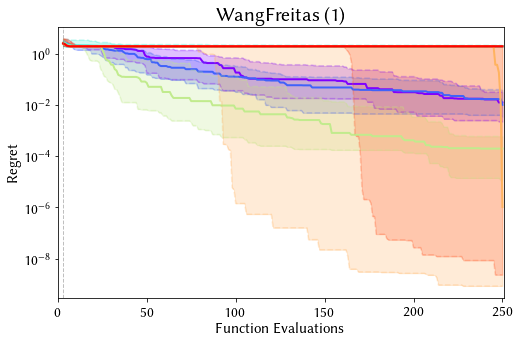

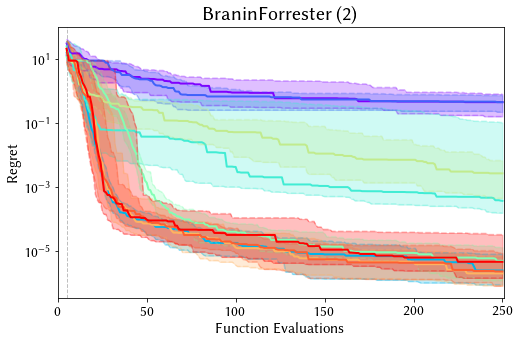

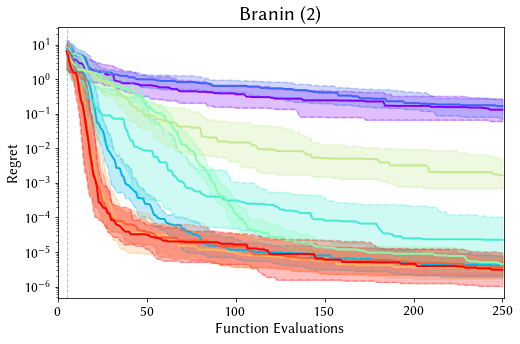

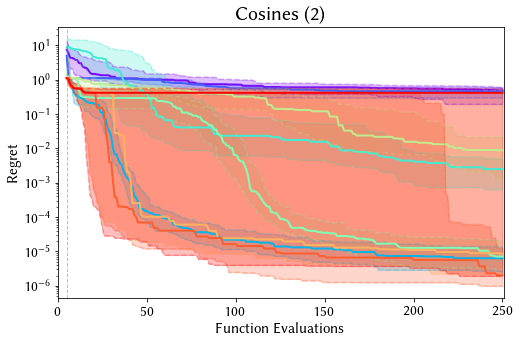

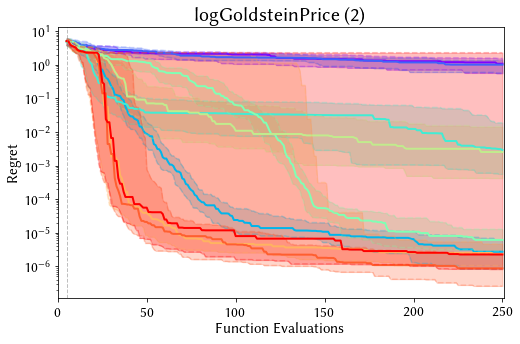

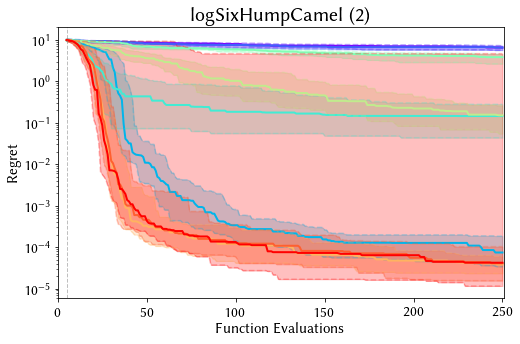

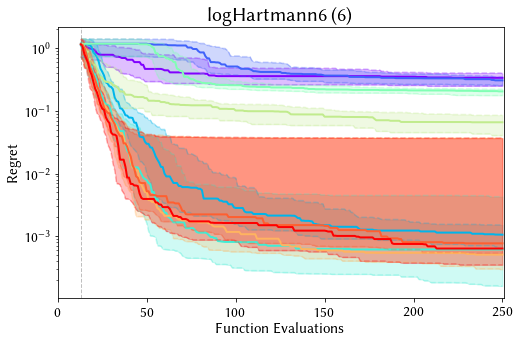

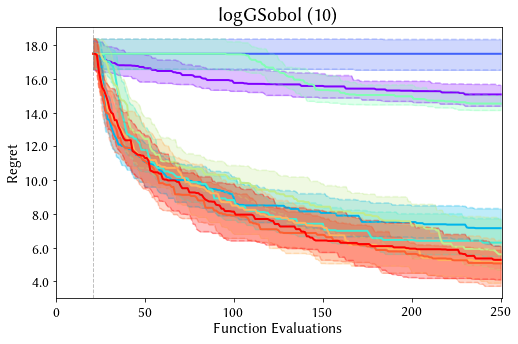

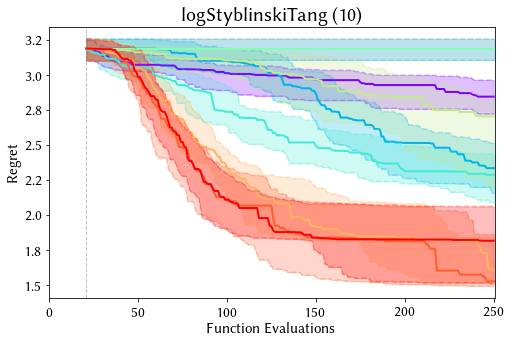

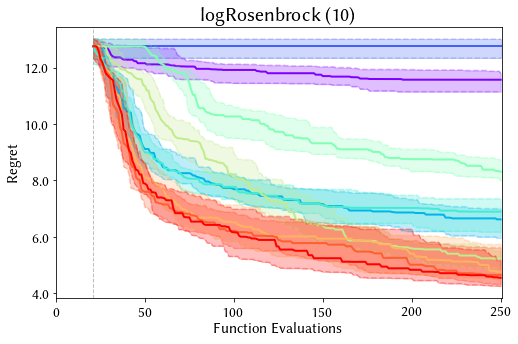

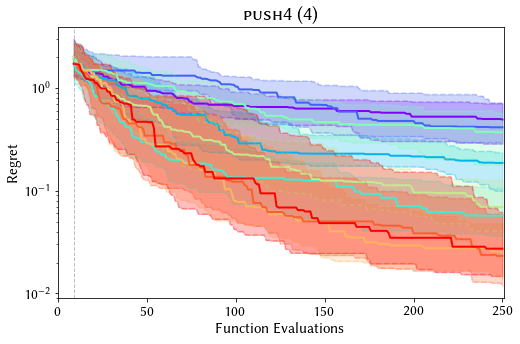

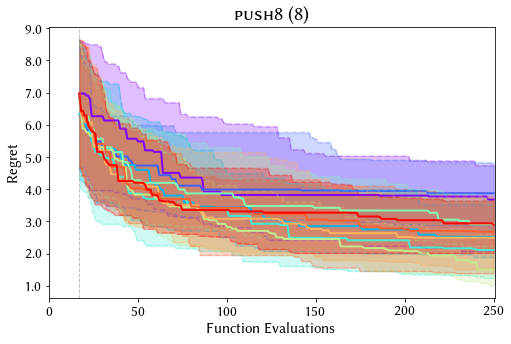

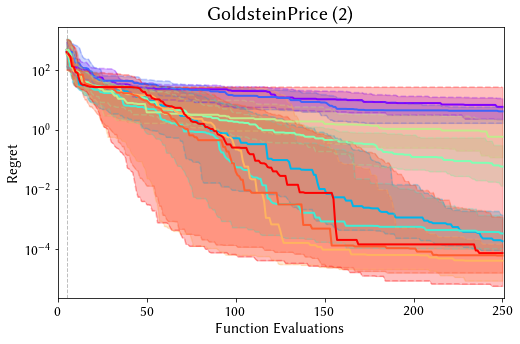

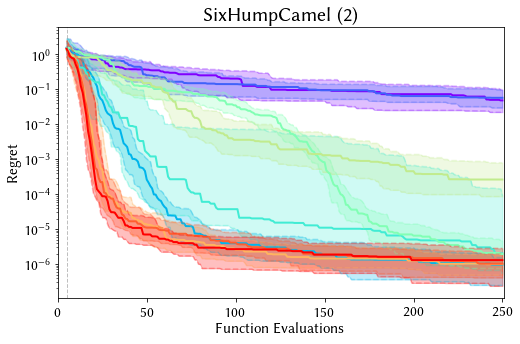

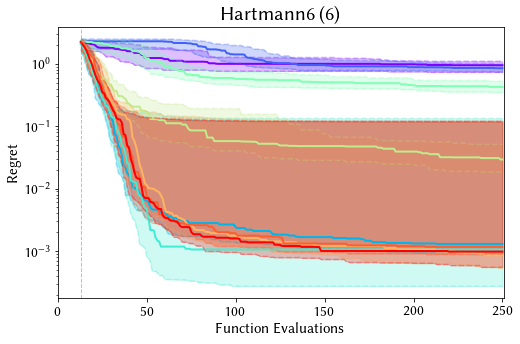

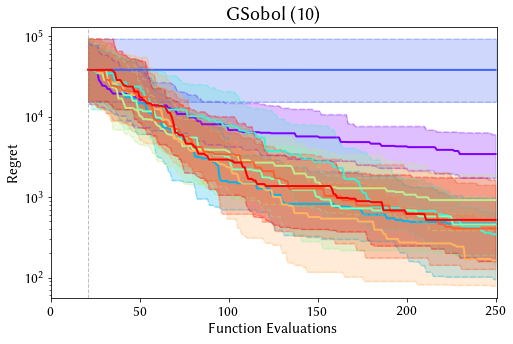

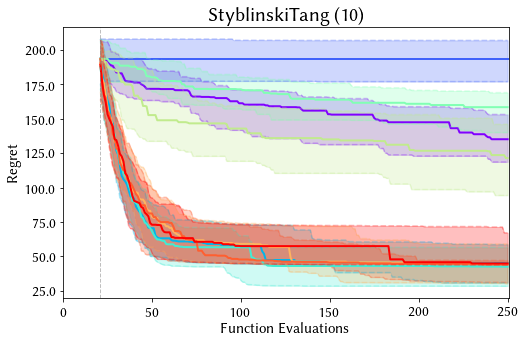

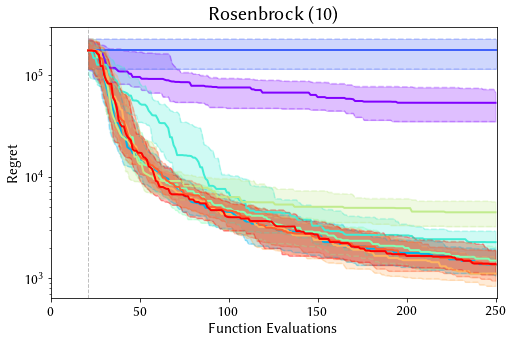

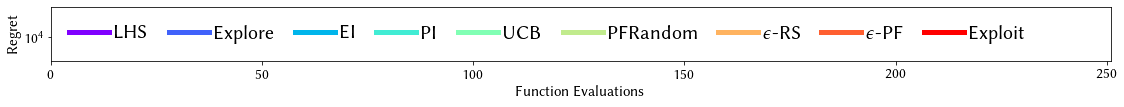

In [6]:
plot_convergence(results, 
                 problem_names,
                 problem_names_for_paper,
                 problem_logplot,
                 method_names, 
                 method_names_for_paper, 
                 LABEL_FONTSIZE=15,
                 TITLE_FONTSIZE=20,
                 TICK_FONTSIZE=15,
                 LEGEND_FONTSIZE=20,
                 save=save_images)

# Combined convergence plots

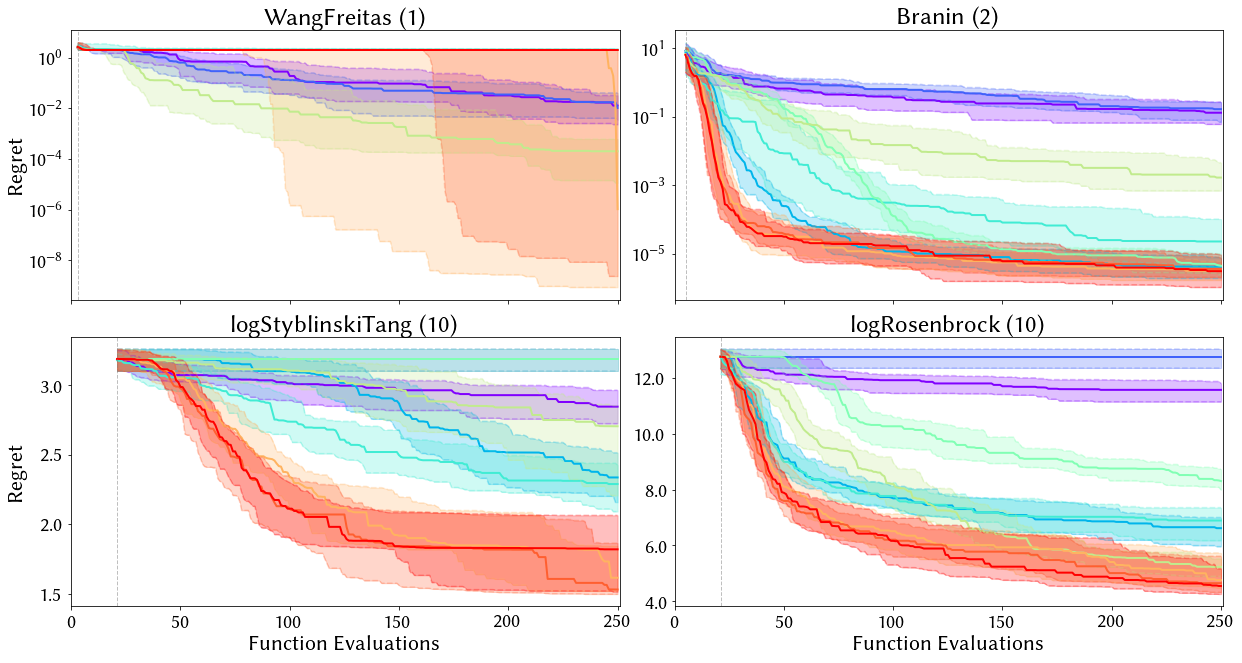

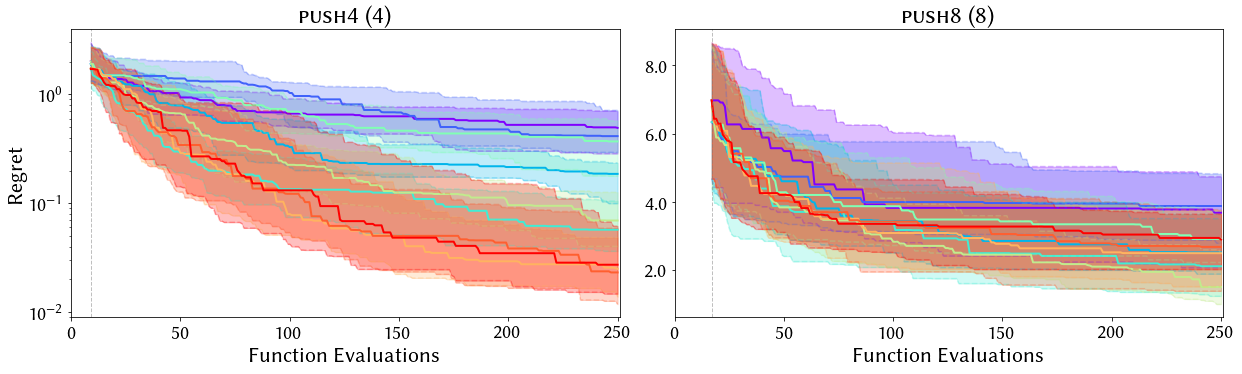

In [7]:
plot_convergence_combined(results, 
                          ['WangFreitas', 'Branin',
                           'logStyblinskiTang', 'logRosenbrock'],
                          ['WangFreitas', 'Branin',
                           'logStyblinskiTang', 'logRosenbrock'],
                          [True, True, 
                           False, False],
                          method_names, 
                          method_names_for_paper, 
                          LABEL_FONTSIZE=22,
                          TITLE_FONTSIZE=25,
                          TICK_FONTSIZE=20,
                          save=save_images)

plot_convergence_combined(results, 
                          ['push4', 'push8'],
                          ['$\\textsc{push4}$', '$\\textsc{push8}$'],
                          [True, False],
                          method_names, 
                          method_names_for_paper, 
                          LABEL_FONTSIZE=22,
                          TITLE_FONTSIZE=25,
                          TICK_FONTSIZE=20,
                          save=save_images)

# Boxplots

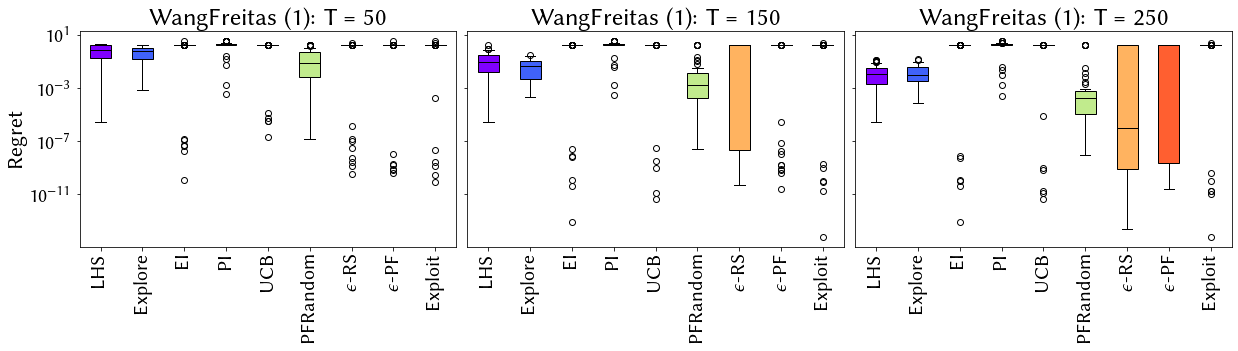

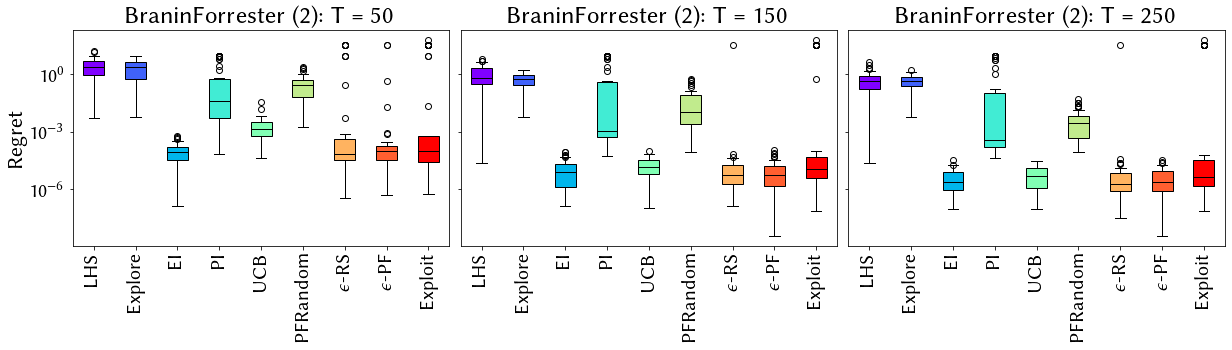

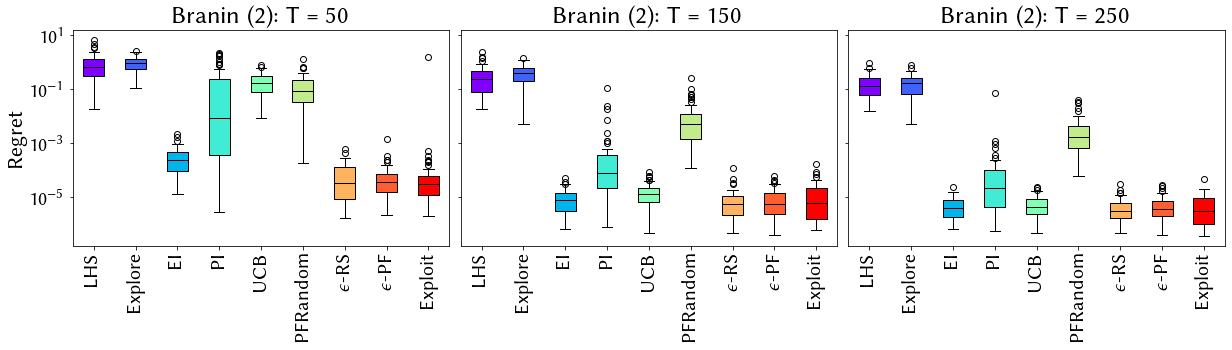

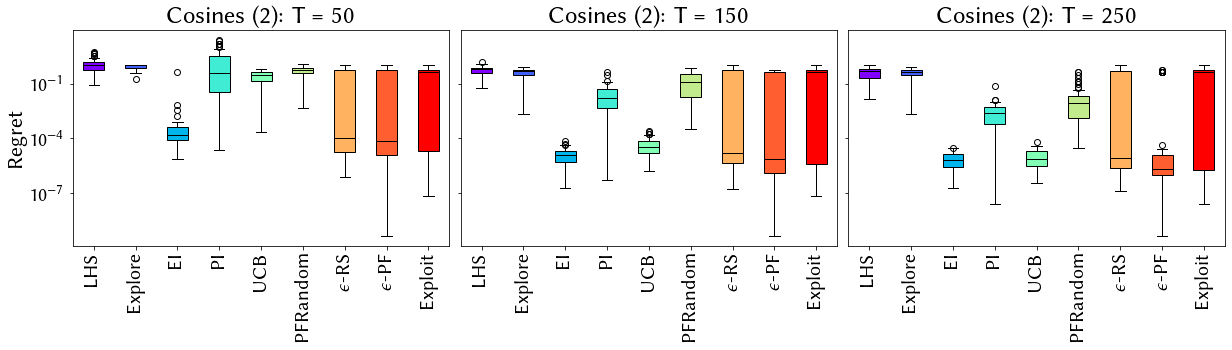

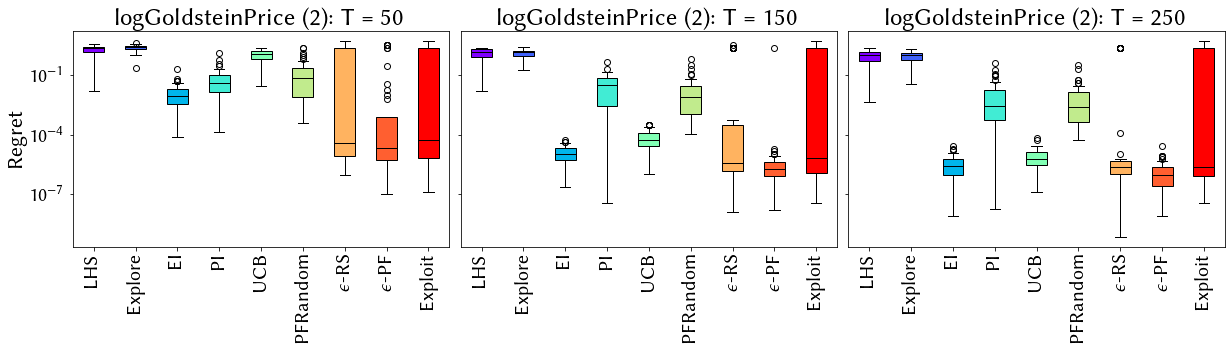

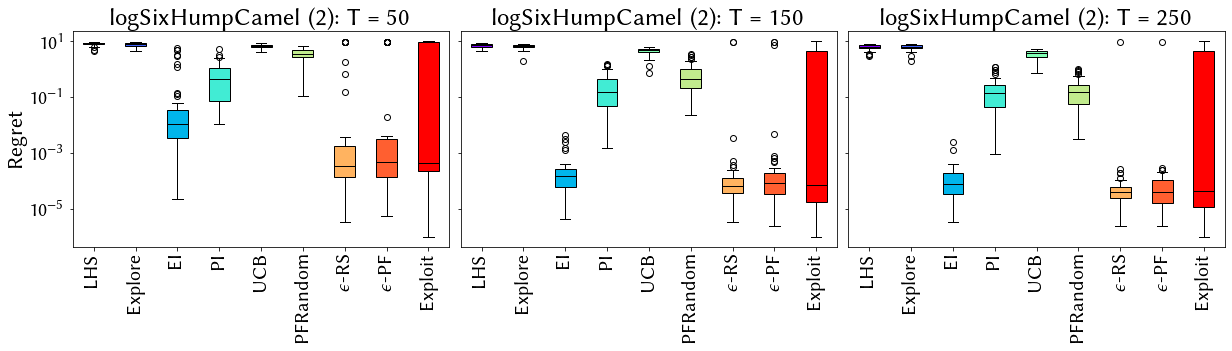

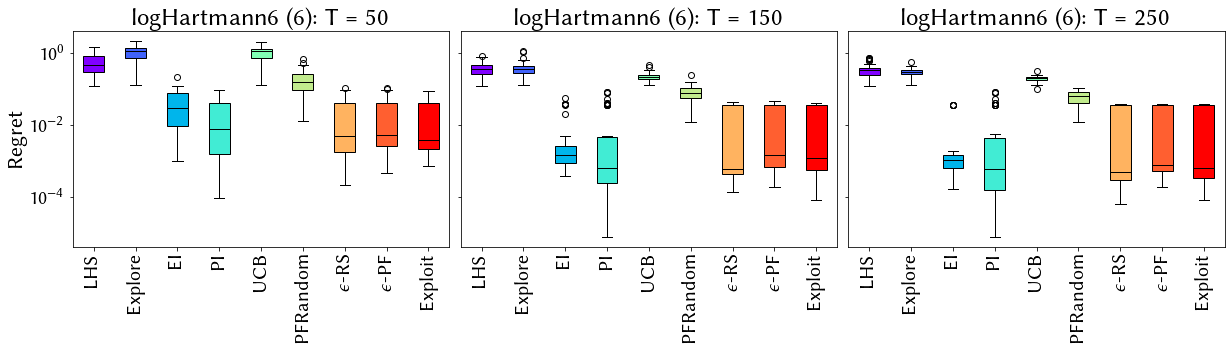

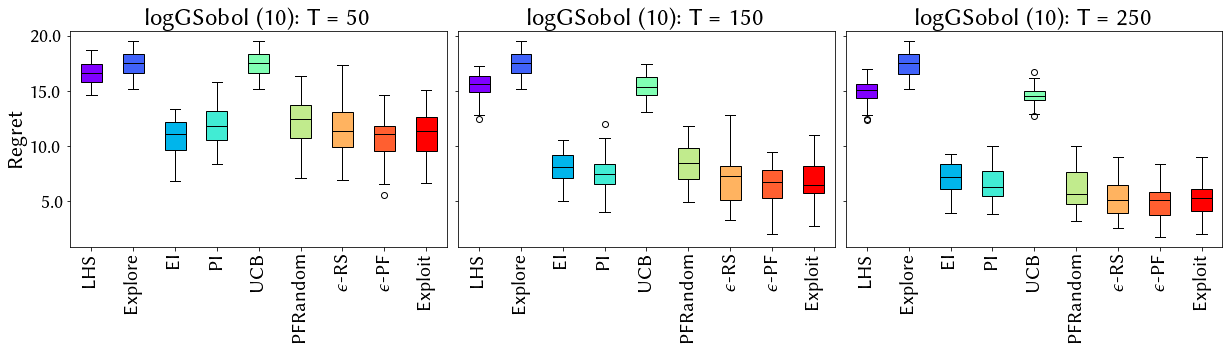

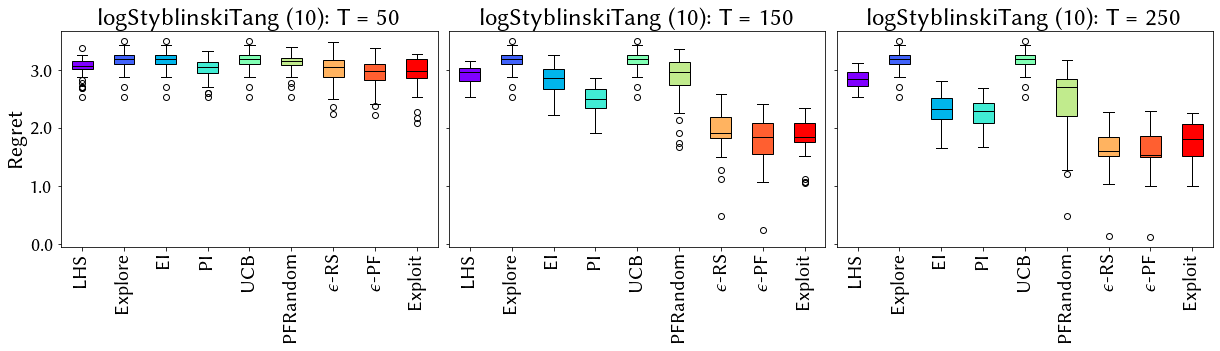

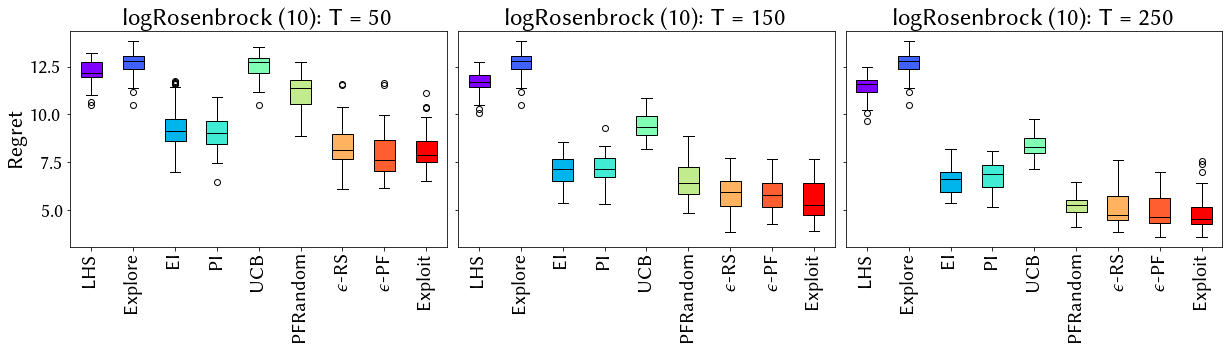

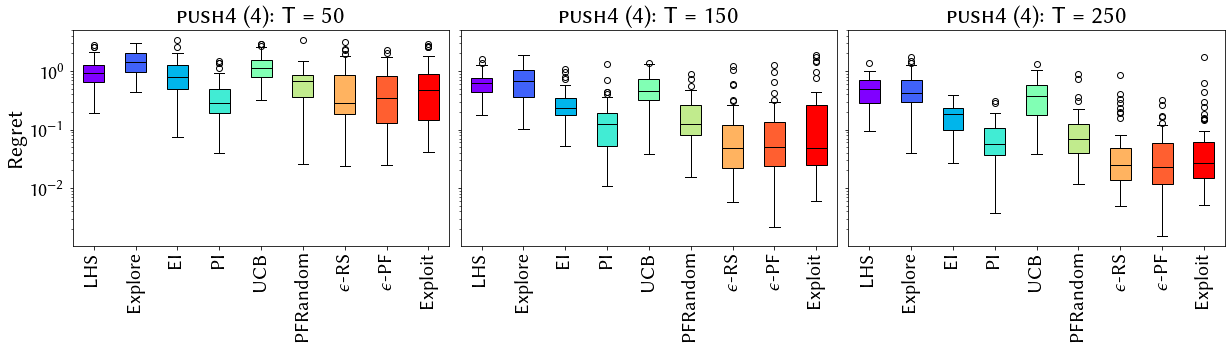

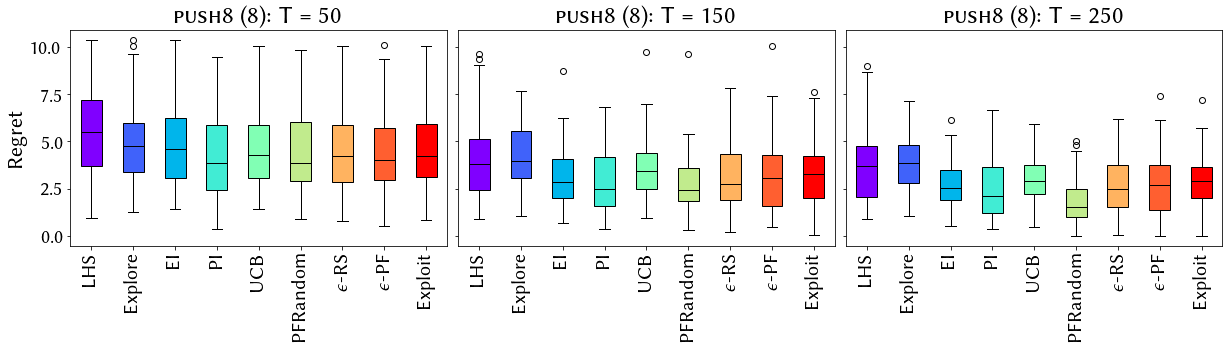

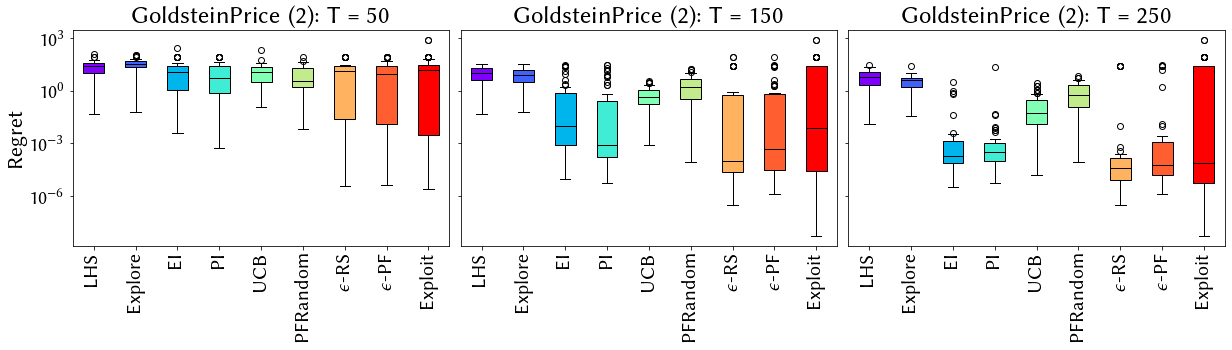

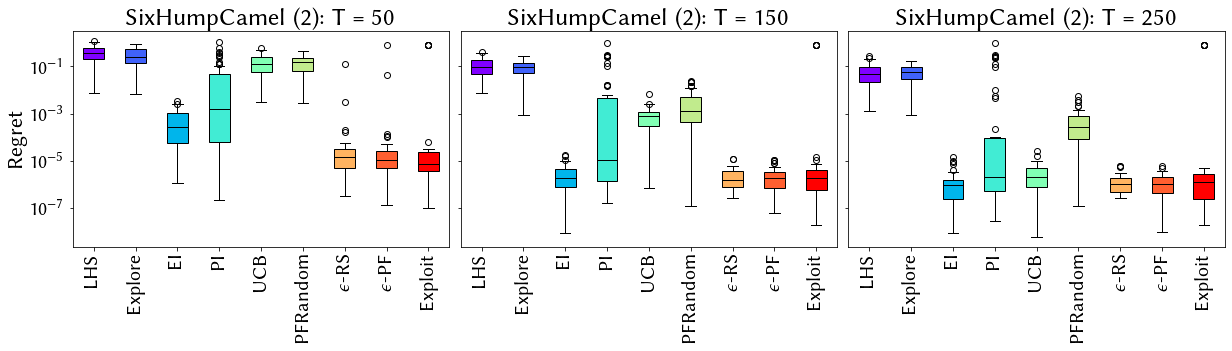

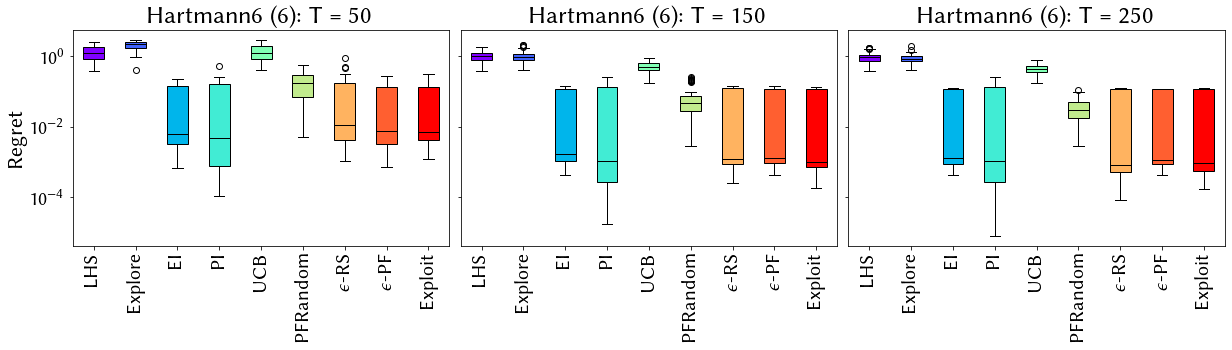

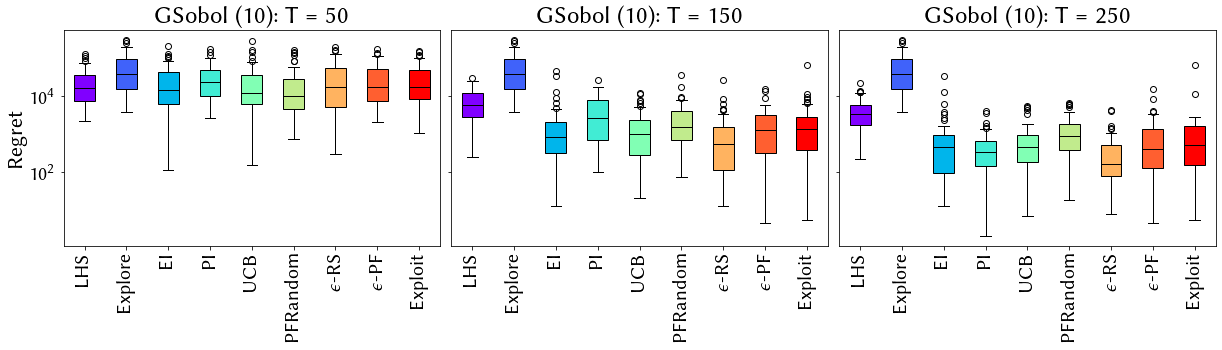

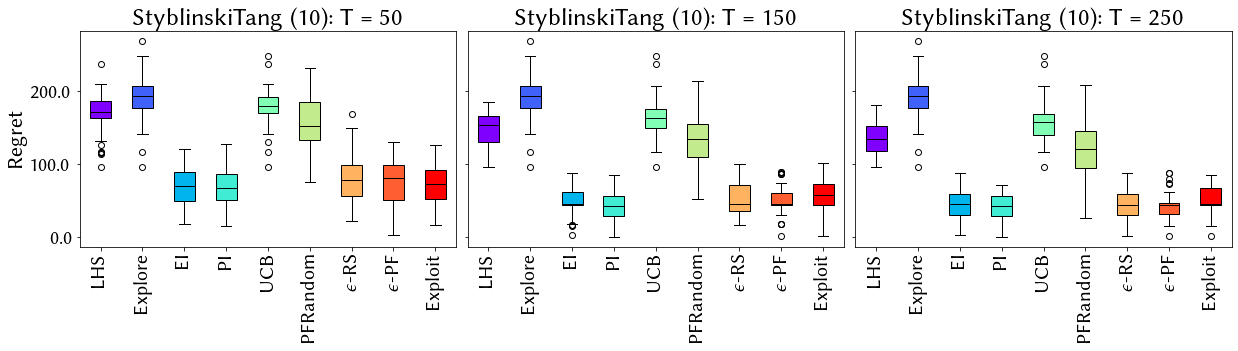

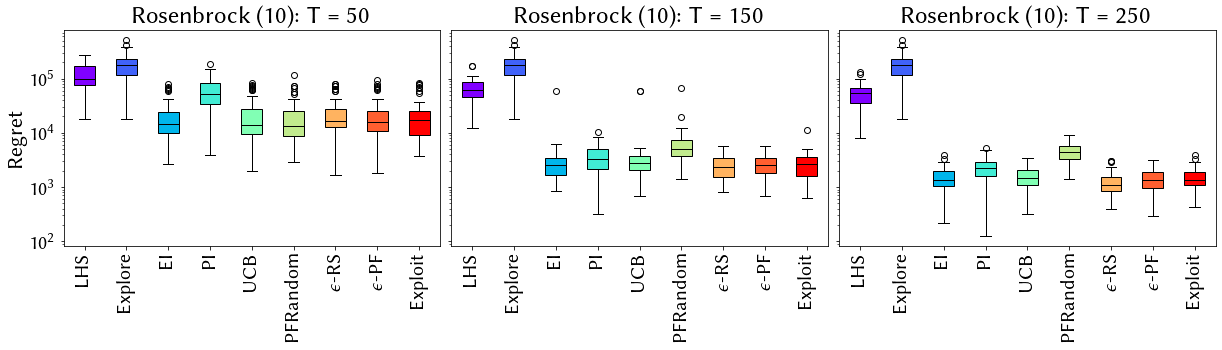

In [8]:
plot_boxplots(results,
              [50, 150, 250],
              problem_names,
              problem_names_for_paper,
              problem_logplot,
              method_names, 
              method_names_for_paper, 
              LABEL_FONTSIZE=22,
              TITLE_FONTSIZE=25,
              TICK_FONTSIZE=20,
              save=save_images)

# Combined boxplots

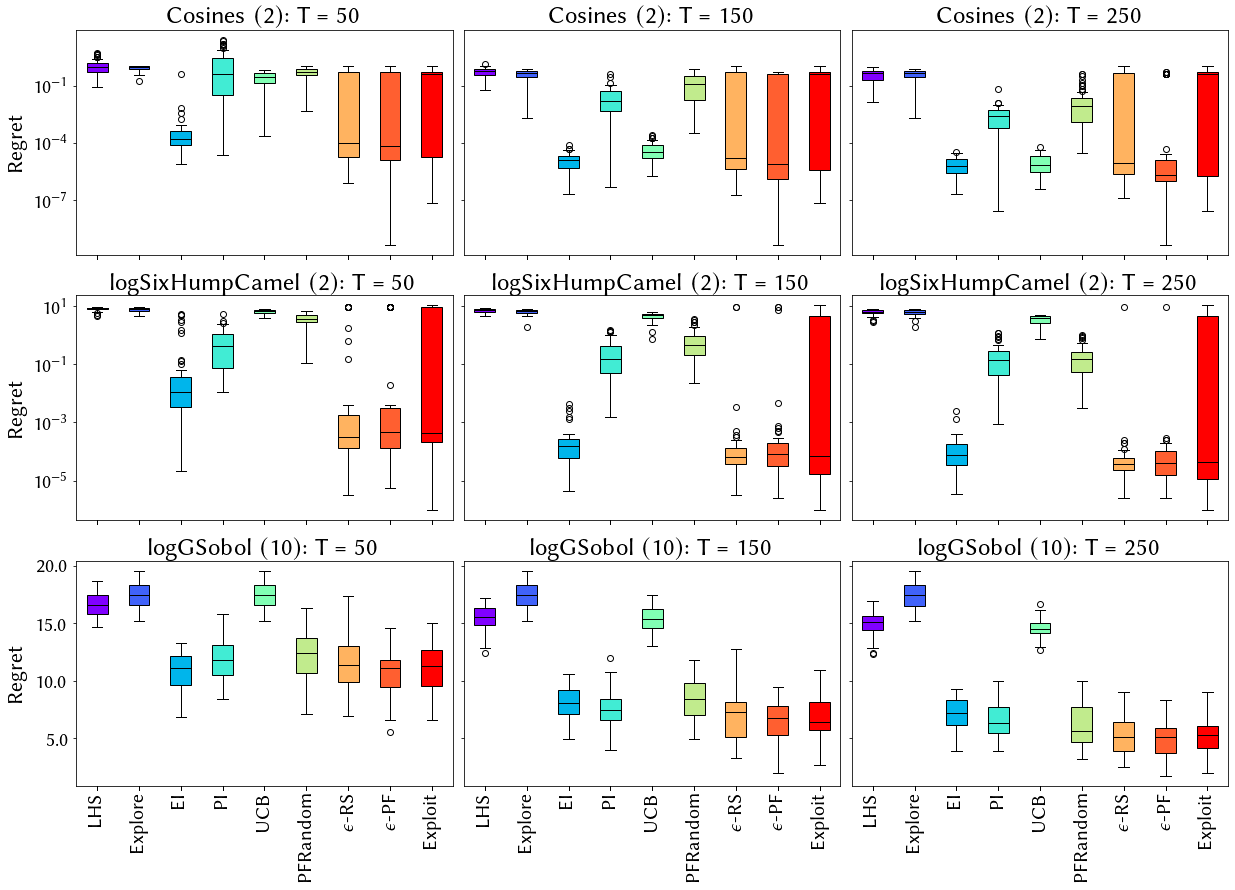

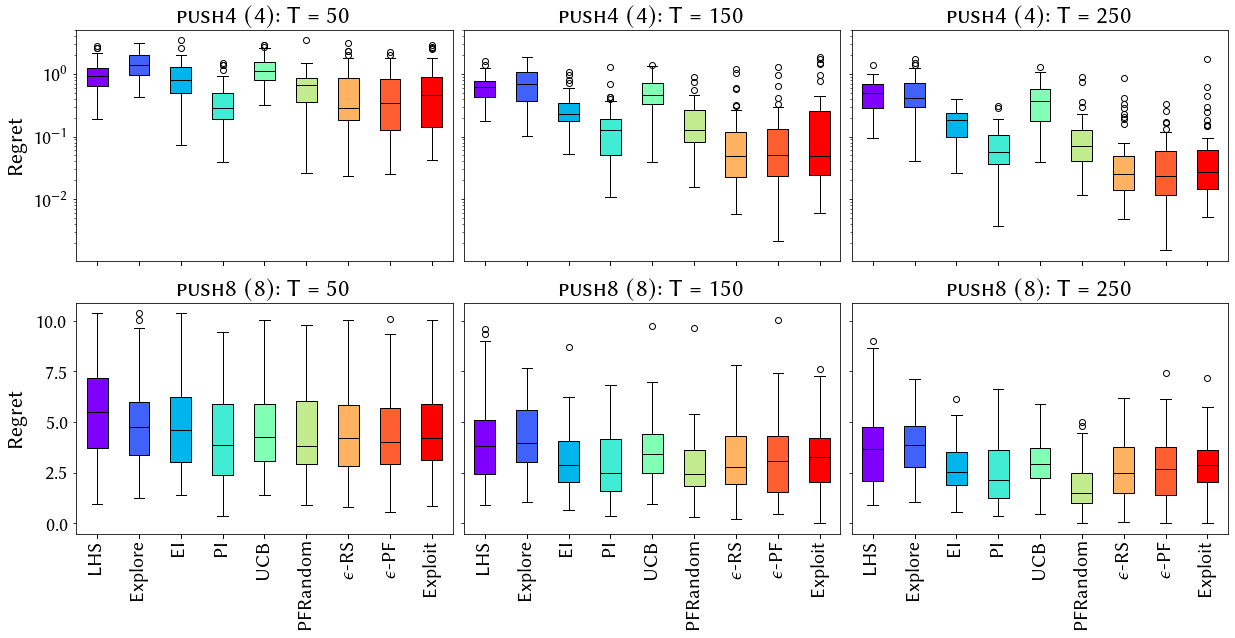

In [9]:
plot_boxplots_combined(results,
              [50, 150, 250],
              ['Cosines', 'logSixHumpCamel', 'logGSobol'],
              ['Cosines', 'logSixHumpCamel', 'logGSobol'],
              [True, True, False],
              method_names, 
              method_names_for_paper, 
              LABEL_FONTSIZE=22,
              TITLE_FONTSIZE=25,
              TICK_FONTSIZE=20,
              save=save_images)

plot_boxplots_combined(results,
              [50, 150, 250],
              ['push4', 'push8'],
              ['$\\textsc{push4}$', '$\\textsc{push8}$'],
              [True, False],
              method_names, 
              method_names_for_paper,
              LABEL_FONTSIZE=22,
              TITLE_FONTSIZE=25,
              TICK_FONTSIZE=20,
              save=save_images)

# $\epsilon$-PF vs $\epsilon$-RS comparison for $\epsilon$ values

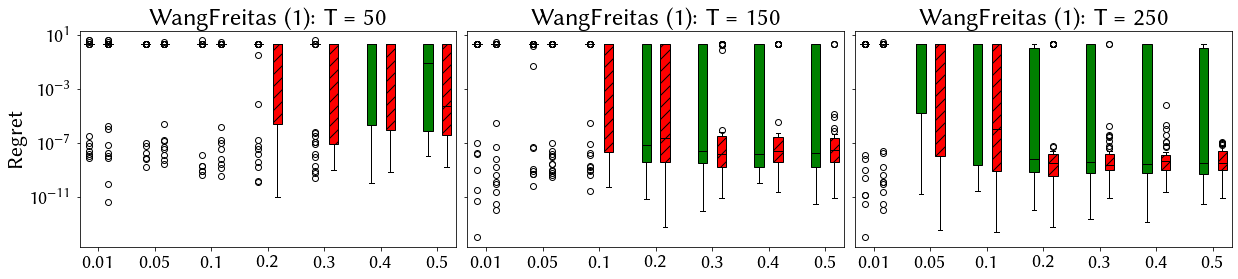

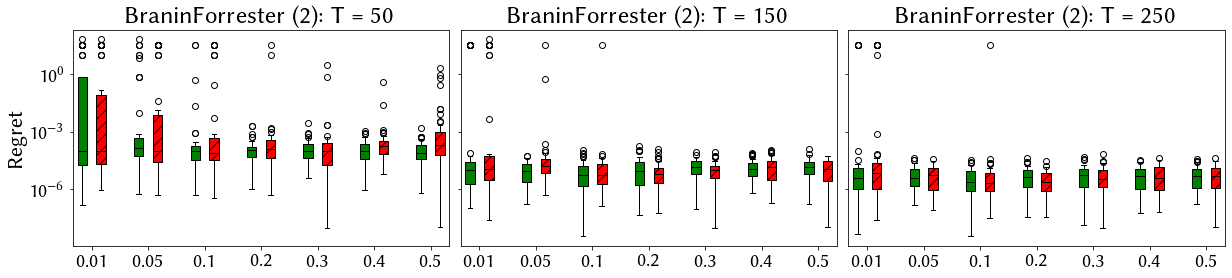

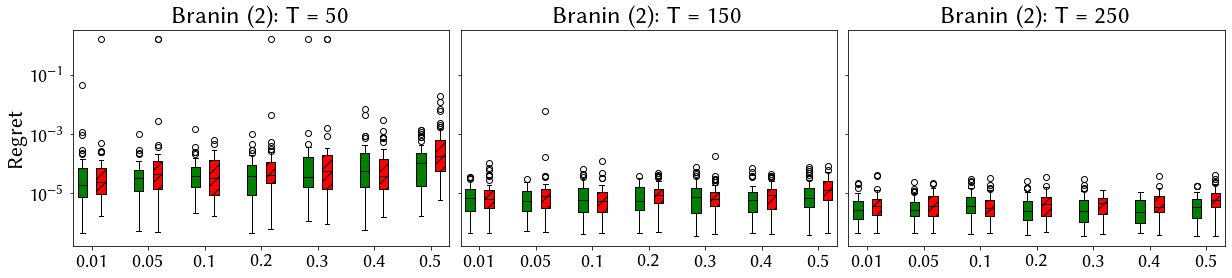

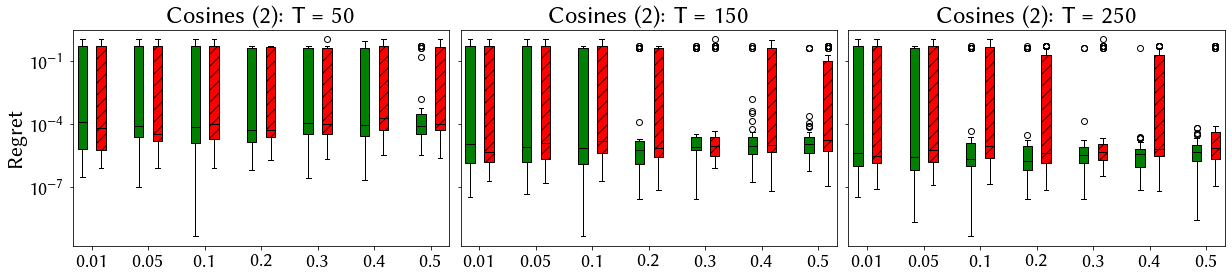

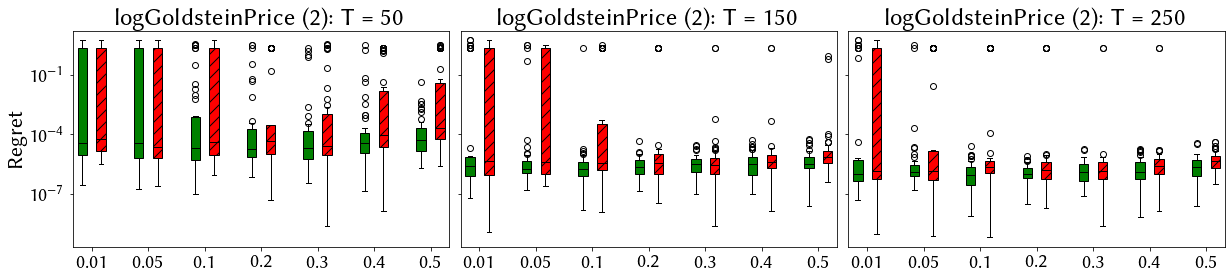

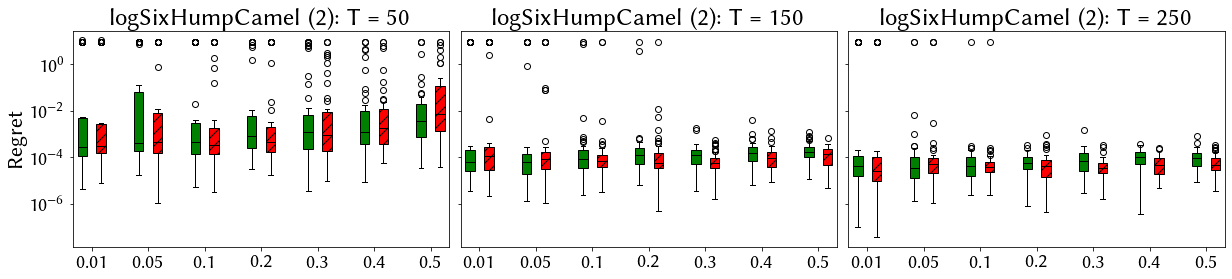

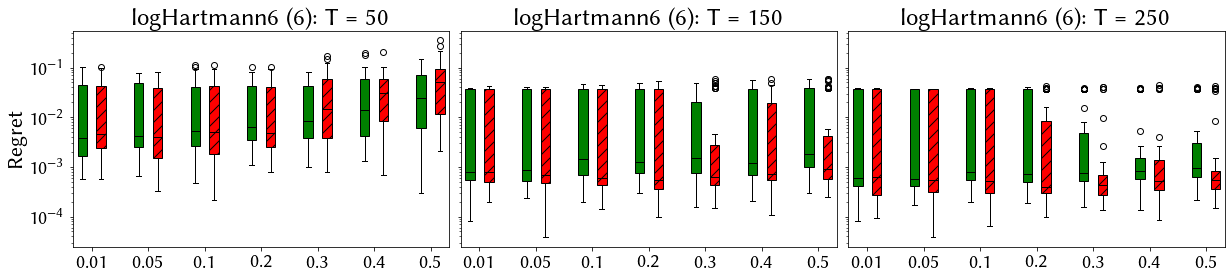

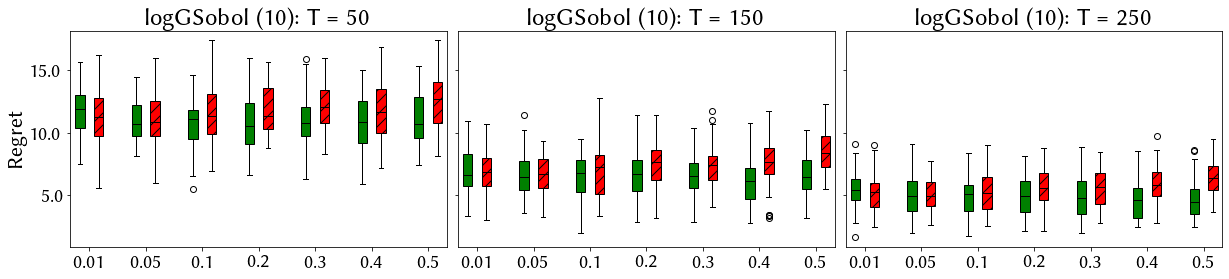

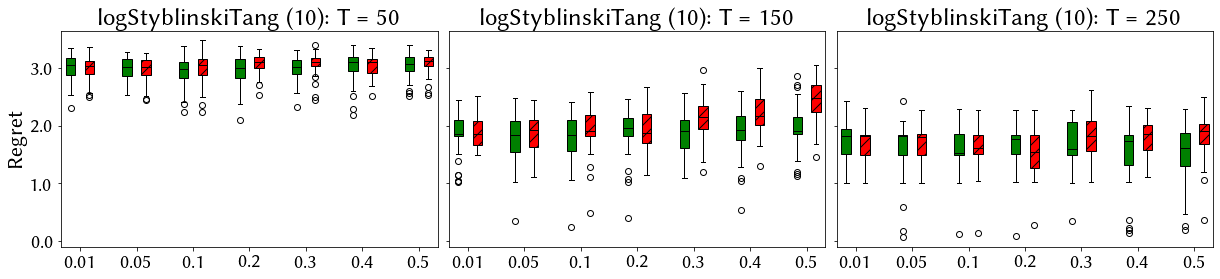

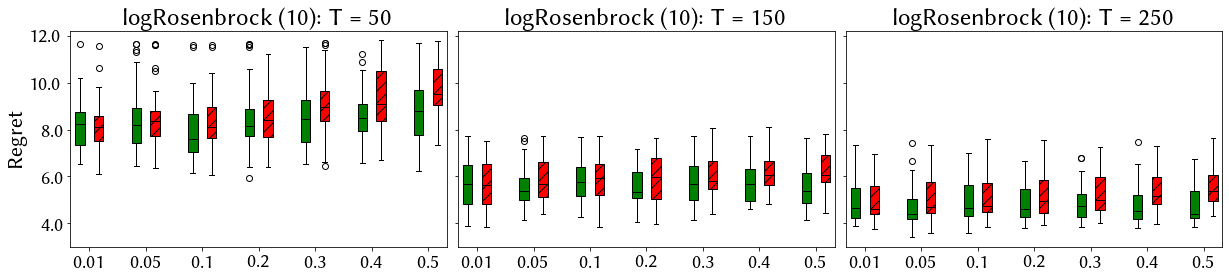

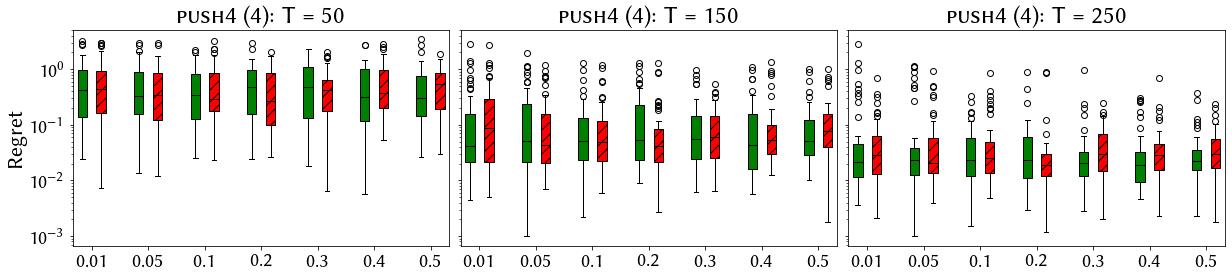

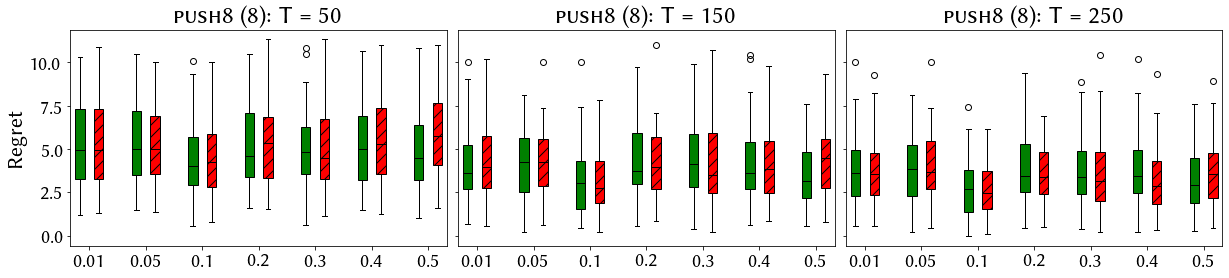

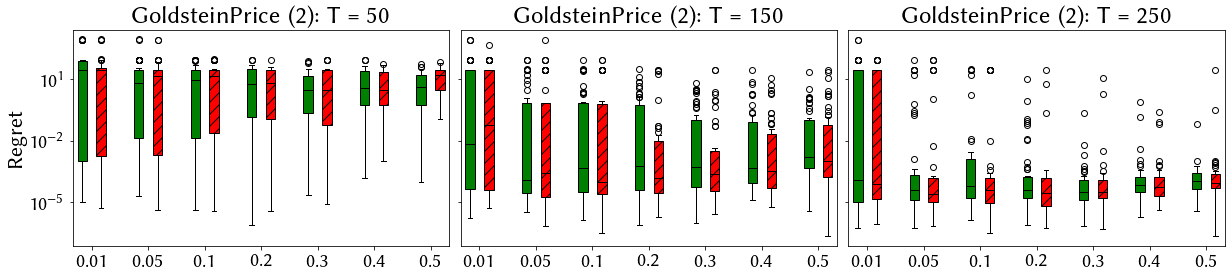

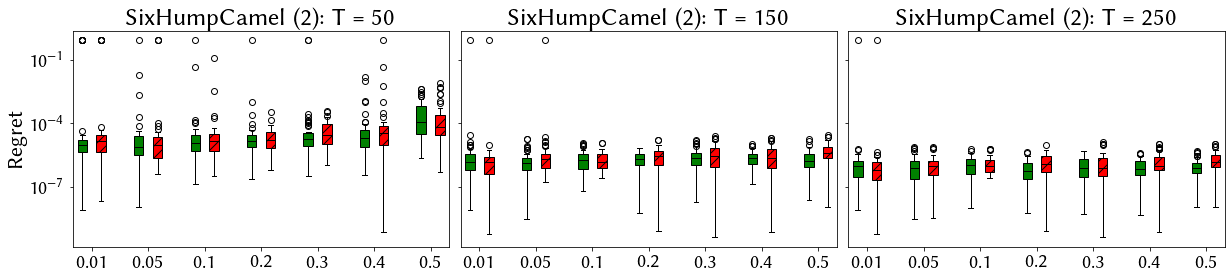

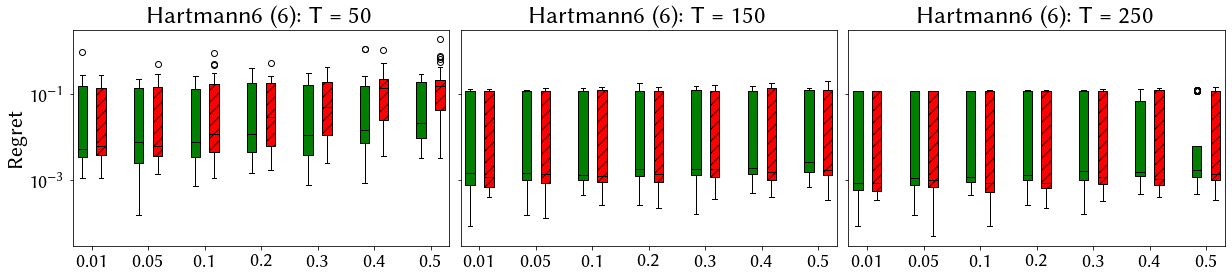

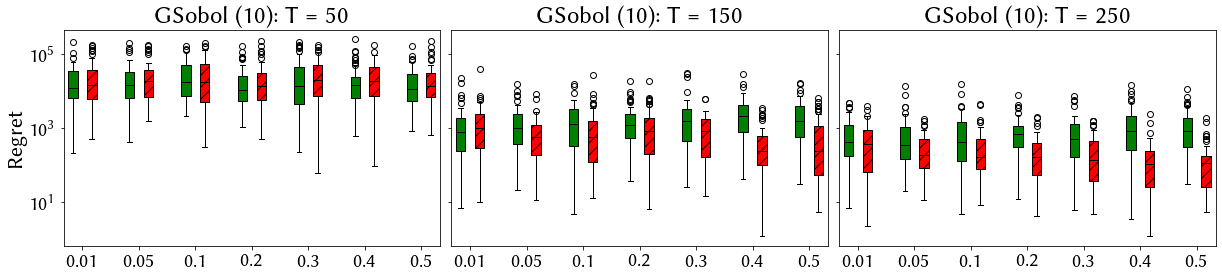

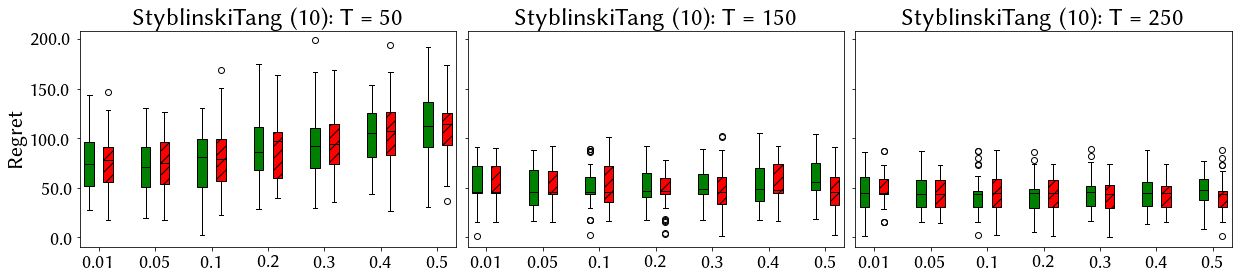

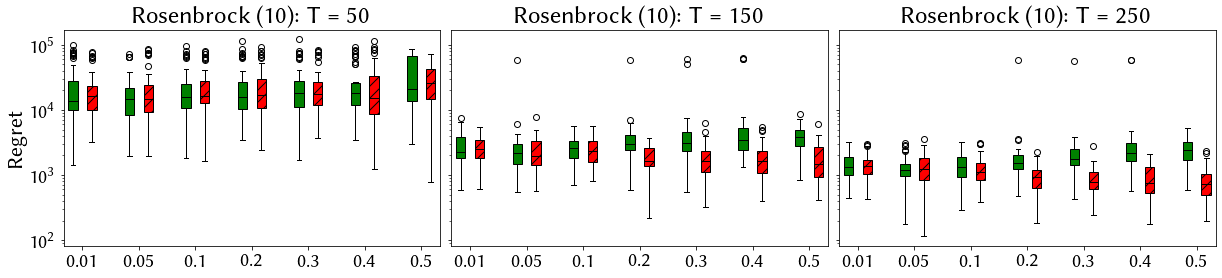

In [10]:
plot_egreedy_comparison(results, 
                        [50, 150, 250],
                        problem_names,
                        problem_names_for_paper,
                        problem_logplot,
                        eg_names,
                        [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                        LABEL_FONTSIZE=22,
                        TITLE_FONTSIZE=25,
                        TICK_FONTSIZE=20,
                        save=save_images)

# Combined $\epsilon$-PF vs $\epsilon$-RS comparison for $\epsilon$ values

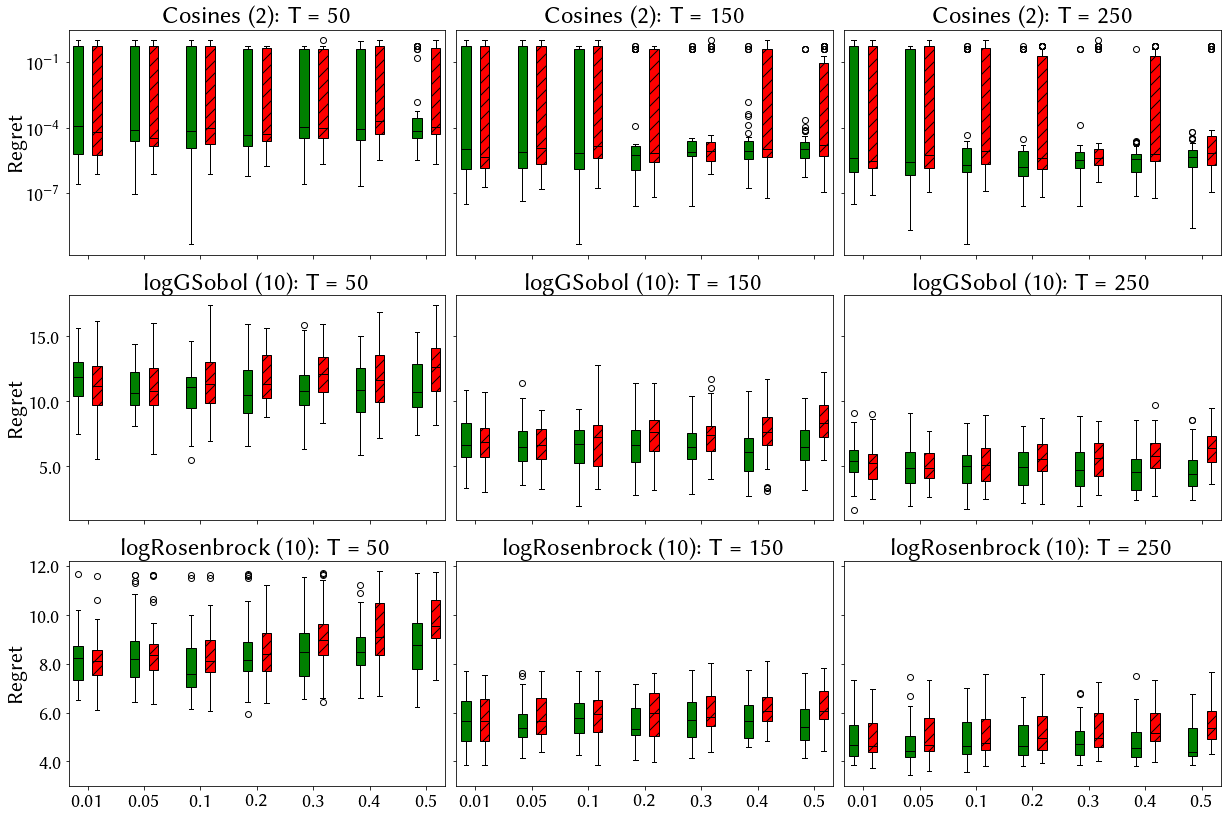

In [11]:
plot_egreedy_comparison_combined(results, 
                                 [50, 150, 250],
                                 ['Cosines', 'logGSobol', 'logRosenbrock'],
                                 ['Cosines', 'logGSobol', 'logRosenbrock'],
                                 [True, False, False],
                                 eg_names,
                                 [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                                 LABEL_FONTSIZE=22,
                                 TITLE_FONTSIZE=25,
                                 TICK_FONTSIZE=20,
                                 save=save_images)

# PitzDaily results
Note these are created separately because rather than `LHS` it has `UNIFORM` as its random-based method to compare to.

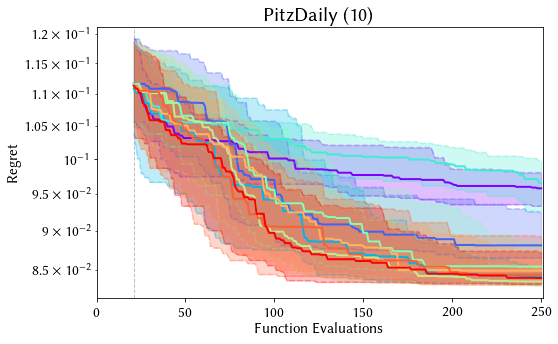

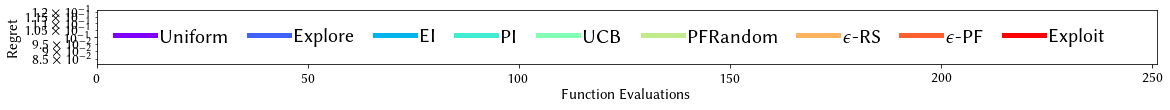

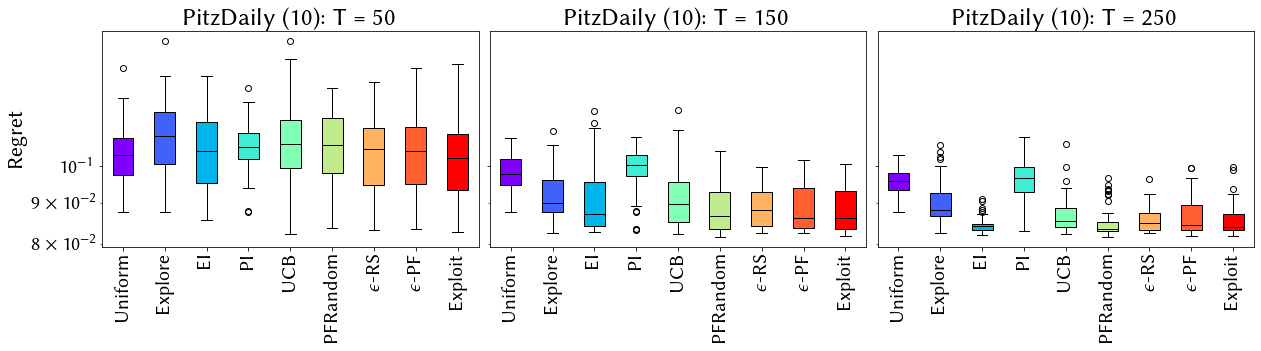

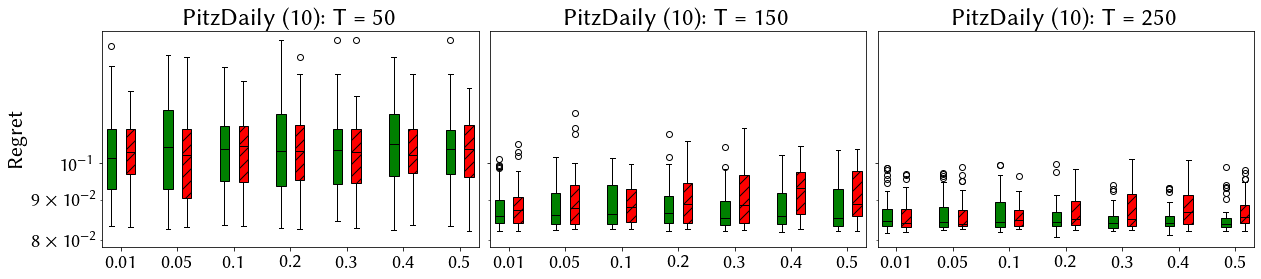

In [12]:
pitzdaily_names = ['PitzDaily']

pitzdaily_names_for_paper = pitzdaily_names

# boolean indicating whether the problem should be plotted with a log axis
pitzdaily_logplot = [True]

pitzdaily_method_names = ['UNIFORM', 'Explore', 'EI', 'PI', 'UCB', 'PFRandom',
                          'eRandom_eps0.1', 'eFront_eps0.1', 'Exploit']

pitzdaily_method_names_for_paper = ['Uniform', 'Explore', 'EI', 'PI', 'UCB',
                                    'PFRandom', '$\epsilon$-RS', 
                                    '$\epsilon$-PF', 'Exploit' ]

# load the results
pitzdaily_results = process_results(results_dir, 
                                    pitzdaily_names, 
                                    pitzdaily_method_names + eg_names)

plot_convergence(pitzdaily_results, 
                 pitzdaily_names,
                 pitzdaily_names_for_paper,
                 pitzdaily_logplot,
                 pitzdaily_method_names, 
                 pitzdaily_method_names_for_paper, 
                 LABEL_FONTSIZE=15,
                 TITLE_FONTSIZE=20,
                 TICK_FONTSIZE=15,
                 LEGEND_FONTSIZE=20,
                 save=save_images)

plot_boxplots(pitzdaily_results,
              [50, 150, 250],
              pitzdaily_names,
              pitzdaily_names_for_paper,
              pitzdaily_logplot,
              pitzdaily_method_names, 
              pitzdaily_method_names_for_paper, 
              LABEL_FONTSIZE=22,
              TITLE_FONTSIZE=25,
              TICK_FONTSIZE=20,
              save=save_images)

plot_egreedy_comparison(pitzdaily_results, 
                        [50, 150, 250],
                        pitzdaily_names,
                        pitzdaily_names_for_paper,
                        pitzdaily_logplot,
                        eg_names,
                        [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                        LABEL_FONTSIZE=22,
                        TITLE_FONTSIZE=25,
                        TICK_FONTSIZE=20,
                        save=save_images)

# Results table creation

The following code creates the main results table of the paper. It finds the technique with the best (lowest) median distance to the optimum and compares each of its best fitness values to that of the other techniques, using the Wilcoxon signed rank test with Holm-Bonferonni correct.

In [13]:
# Main results table

problem_rows = [['WangFreitas', 'BraninForrester', 'Branin', 
                 'Cosines', 'logGoldsteinPrice'],
                ['logSixHumpCamel', 'logHartmann6', 'logGSobol', 
                 'logRosenbrock', 'logStyblinskiTang']]
problem_paper_rows = problem_rows
problem_dim_rows = [[1, 2, 2, 2, 2], [2, 6, 10, 10, 10]]

method_names = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 'PFRandom',
                'eRandom_eps0.1', 'eFront_eps0.1', 'Exploit']

method_names_for_table = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 
                          'PFRandom', '\eRandom', '\eFront',
                          'Exploit' ]


table_data = create_table_data(results, problem_names, method_names, 51)

create_table(table_data, problem_rows, problem_paper_rows, 
             problem_dim_rows, method_names, method_names_for_table)


  \begin{table}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c|}{\bfseries WangFreitas (1)} 
    & \multicolumn{2}{c|}{\bfseries BraninForrester (2)} 
    & \multicolumn{2}{c|}{\bfseries Branin (2)} 
    & \multicolumn{2}{c|}{\bfseries Cosines (2)} 
    & \multicolumn{2}{c}{\bfseries logGoldsteinPrice (2)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LHS & 1.27e-02 & 1.80e-02 & 4.59e-01 & 4.73e-01 & 1.31e-01 & 1.33e-01 & 4.79e-01 & 2.71e-01 & 1.08e+00 & 7.69e-01 \\
    Explore & 1.04e-02 & 1.42e-02 & 4.58e-01 & 3.52e-01 & 1.66e-01 & 1.56e-0

In [14]:
# push4 and push8 results table

problem_rows = [['push4', 'push8']]
problem_paper_rows = [['\\textsc{push4}', '\\textsc{push8}']]
problem_dim_rows = [[4, 8]]

method_names = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 'PFRandom',
                'eRandom_eps0.1', 'eFront_eps0.1', 'Exploit']

method_names_for_table = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 
                          'PFRandom', '\eRandom', '\eFront',
                          'Exploit' ]


table_data = create_table_data(results, problem_names, method_names, 51)

create_table(table_data, problem_rows, problem_paper_rows, 
             problem_dim_rows, method_names, method_names_for_table)


  \begin{table}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c|}{\bfseries \textsc{push4} (4)} 
    & \multicolumn{2}{c}{\bfseries \textsc{push8} (8)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LHS & 4.93e-01 & 3.08e-01 & 3.68e+00 & 2.18e+00 \\
    Explore & 4.14e-01 & 2.41e-01 & 3.88e+00 & 1.44e+00 \\
    EI & 1.86e-01 & 1.05e-01 & 2.52e+00 & 1.07e+00 \\
    PI & 5.72e-02 & 4.45e-02 & 2.11e+00 & 1.47e+00 \\
    UCB & 3.70e-01 & 2.90e-01 & 2.91e+00 & 1.19e+00 \\
    PFRandom & 6.95e-02 & 6.71e-02 & \best 1.50e+00 & \best 1.07e+00 \\
    \eRandom & \statsimilar 2.50e-02 & \statsimilar 2.17e-02 & 2.49e+00 & 1.56e+00 \\
    \eFront & \best 2.32e-02 & \best 2.47e-02 & 2.68e+00 & 1.80e+00 \\
    Exploit & \statsimilar 2

In [15]:
# PitzDaily results table

problem_rows = [['PitzDaily']]
problem_paper_rows = problem_rows
problem_dim_rows = [[10]]

pitzdaily_method_names_for_table = ['Uniform', 'Explore', 'EI', 'PI', 'UCB', 
                          'PFRandom', '\eRandom', '\eFront',
                          'Exploit' ]

table_data = create_table_data(pitzdaily_results, pitzdaily_names, 
                               pitzdaily_method_names, 51)

create_table(table_data, problem_rows, problem_paper_rows, 
             problem_dim_rows, pitzdaily_method_names, 
             pitzdaily_method_names_for_table)


  \begin{table}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c}{\bfseries PitzDaily (10)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    Uniform & 9.58e-02 & 3.52e-03 \\
    Explore & 8.82e-02 & 4.82e-03 \\
    EI & \statsimilar 8.42e-02 & \statsimilar 1.43e-03 \\
    PI & 9.66e-02 & 4.96e-03 \\
    UCB & 8.55e-02 & 2.96e-03 \\
    PFRandom & \best 8.36e-02 & \best 9.72e-04 \\
    \eRandom & \statsimilar 8.49e-02 & \statsimilar 2.68e-03 \\
    \eFront & \statsimilar 8.45e-02 & \statsimilar 2.44e-03 \\
    Exploit & \statsimilar 8.40e-02 & \statsimilar 1.82e-03 \\
\bottomrule
  \end{tabular}
  }
  \vspace*{0.1mm}
  \caption{}
  \label{tbl:synthetic_results}
  \end{table}



In [16]:
# unmodified functions table

problem_rows = [['GoldsteinPrice', 'SixHumpCamel', 'Hartmann6'],
                ['GSobol', 'Rosenbrock', 'StyblinskiTang']]
problem_paper_rows = problem_rows
problem_dim_rows = [[1, 2, 2, 2, 2], [2, 6, 10, 10, 10]]

method_names = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 'PFRandom',
                'eRandom_eps0.1', 'eFront_eps0.1', 'Exploit']

method_names_for_table = ['LHS', 'Explore', 'EI', 'PI', 'UCB', 
                          'PFRandom', '\eRandom', '\eFront',
                          'Exploit' ]


table_data = create_table_data(results, problem_names, method_names, 51)

create_table(table_data, problem_rows, problem_paper_rows, 
             problem_dim_rows, method_names, method_names_for_table)


  \begin{table}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c|}{\bfseries GoldsteinPrice (1)} 
    & \multicolumn{2}{c|}{\bfseries SixHumpCamel (2)} 
    & \multicolumn{2}{c}{\bfseries Hartmann6 (2)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LHS & 5.85e+00 & 6.39e+00 & 4.85e-02 & 5.32e-02 & 9.50e-01 & 2.71e-01 \\
    Explore & 4.13e+00 & 3.25e+00 & 5.75e-02 & 4.75e-02 & 8.51e-01 & 1.77e-01 \\
    EI & 1.82e-04 & 2.27e-04 & \best 9.57e-07 & \best 9.79e-07 & 1.30e-03 & 6.67e-04 \\
    PI & 3.30e-04 & 3.97e-04 & 2.02e-06 & 2.93e-06 & \statsimilar 1.06e-03 & \statsimilar 1.43e-03 \\
    UCB & 5.80e-02 & 8.50e-02 & 1.92e-06 & 2.42e-06 & 4.25e-01 & 1.26e-01 \\